In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, SMOTENC, SMOTEN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold, ClusterCentroids
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")

data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'TBL','fraction_genome_altered','aneuploidy_score','TMB'], axis=1, inplace=True)

In [33]:
def KNN2(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_cross=False, do_smote=False, type_smote='SMOTE', weight='uniform'):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)
    X.head()

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1, weights=weight)

    if do_cross == False:
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


        if do_smote:
            if type_smote == 'ADASYN':
                smote = ADASYN(random_state=random_state)
            elif type_smote == 'RandomOverSampler':
                smote = RandomOverSampler(random_state=random_state)
            elif type_smote == 'KMeansSMOTE':
                smote = KMeansSMOTE(random_state=random_state)
            elif type_smote == 'SMOTE':
                smote = SMOTE(random_state=random_state)
            elif type_smote == 'BorderlineSMOTE':
                smote = BorderlineSMOTE(random_state=random_state)
            elif type_smote == 'SVMSMOTE':
                smote = SVMSMOTE(random_state=random_state)
            elif type_smote == 'SMOTEN':
                smote = SMOTEN(random_state=random_state)
            elif type_smote == 'ClusterCentroids':
                smote = ClusterCentroids(random_state=random_state)
            elif type_smote == 'RandomUnderSampler':
                smote = RandomUnderSampler(random_state=random_state)
            elif type_smote == 'InstanceHardnessThreshold':
                smote = InstanceHardnessThreshold(random_state=random_state)
            elif type_smote == 'NearMiss':
                smote = NearMiss()
            elif type_smote == 'TomekLinks':
                smote = TomekLinks(random_state=random_state)
            elif type_smote == 'EditedNearestNeighbours':
                smote = EditedNearestNeighbours(random_state=random_state)
            elif type_smote == 'RepeatedEditedNearestNeighbours':
                smote = RepeatedEditedNearestNeighbours(random_state=random_state)
            elif type_smote == 'AllKNN':
                smote = AllKNN(random_state=random_state)
            elif type_smote == 'OneSidedSelection':
                smote = OneSidedSelection(random_state=random_state)
            elif type_smote == 'CondensedNearestNeighbour':
                smote = CondensedNearestNeighbour(random_state=random_state)
            elif type_smote == 'NeighbourhoodCleaningRule':
                smote = NeighbourhoodCleaningRule(random_state=random_state)

            if type_smote != 'none':
                X_train, Y_train = smote.fit_resample(X_train, Y_train)
            
        # Train the model
        knn.fit(X_train, Y_train)
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(Y_test, y_pred)
        return accuracy
    else: 
        # Perform cross-validation
        if do_smote:
            smote = SMOTE(random_state=random_state)
            X, y = smote.fit_resample(X, y)
        scores = cross_val_score(knn, X, y, cv=do_cross)
        # Print the cross-validation scores
        return scores.mean()

In [78]:
number_of_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
cross_validation_list = [2, 4, 6, 8, 10]
training_size = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
all_smotes = [
    "none", 
    "ADASYN",
    "KMeansSMOTE",
    "SMOTE",
    "BorderlineSMOTE",
]

In [62]:
baseline_accuracy_scores = []
accuracy_scores_1 = []
for i in all_smotes:
    accuracy_scores = []
    for j in number_of_neighbors_list:
        accuracy = KNN2(neighbors=j, do_smote=True, type_smote = i)
        accuracy_scores.append(accuracy)
        if i == "none":
            baseline_accuracy_scores.append(accuracy)
    accuracy_scores_1.append((i, accuracy_scores))

AttributeError: 'Axes' object has no attribute 'show'

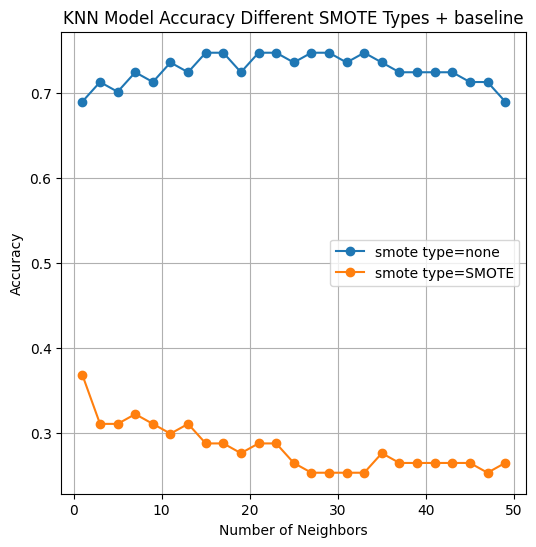

In [66]:
fig = plt.figure(figsize=(6, 6))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_1)):
    fig.plot(number_of_neighbors_list, accuracy_scores_1[i][1], marker='o', label="smote type={}".format(accuracy_scores_1[i][0]))
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy Different SMOTE Types + baseline')
fig.legend()
fig.grid(True)

training size =  2
training size =  4
training size =  6
training size =  8
training size =  10


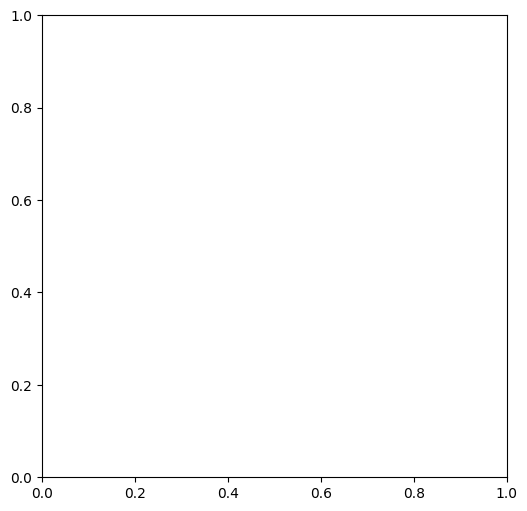

In [70]:
accuracy_scores_2 = []
for j in cross_validation_list:
    print("training size = ", j)
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, do_smote=True, do_cross=j)
        accuracy_scores.append(accuracy)
    accuracy_scores_2.append((j, accuracy_scores))

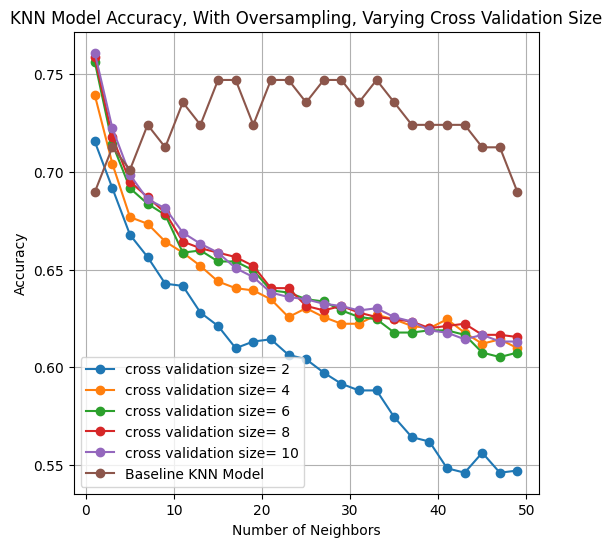

In [73]:
fig = plt.figure(figsize=(6, 6))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_2)):
    fig.plot(number_of_neighbors_list, accuracy_scores_2[i][1], marker='o', label="cross validation size= {}".format(accuracy_scores_2[i][0]))
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")

fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, With Oversampling, Varying Cross Validation Size')
fig.legend()
fig.grid(True)

In [79]:
accuracy_scores_3 = []
for j in training_size:
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, test_size=j)
        accuracy_scores.append(accuracy)
    accuracy_scores_3.append((j, accuracy_scores))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 43, n_neighbors = 45

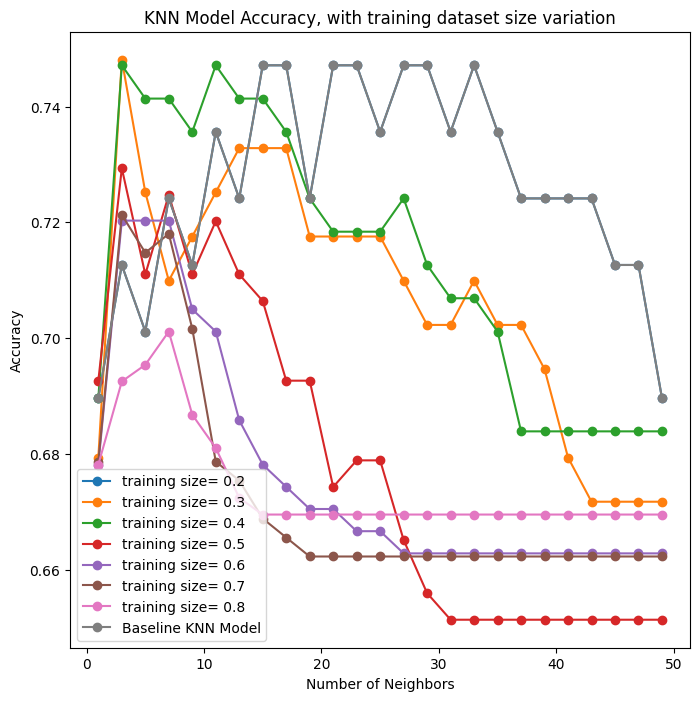

In [80]:
fig = plt.figure(figsize=(8, 8))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_3)):
    fig.plot(number_of_neighbors_list, accuracy_scores_3[i][1], marker='o', label="training size= {}".format(accuracy_scores_3[i][0]))
plt.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy, with training dataset size variation')
plt.legend()
plt.show()